In [1]:
pip install ucimlrepo

In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.0 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from ucimlrepo import fetch_ucirepo

# Fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets.squeeze()

In [4]:
# Check for null values in features and targets
print("Checking for null values in features:")
print(X.isnull().sum())
print("\nChecking for null values in targets:")
print(y.isnull().sum())

Checking for null values in features:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

Checking for null values in targets:
0


In [5]:
# Encode categorical and boolean variables, standardize features
le = LabelEncoder()
scaler = StandardScaler()

# Encode categorical variables
for column in ['Month', 'VisitorType']:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

# Convert boolean to int
if X['Weekend'].dtype == 'bool':
    X['Weekend'] = X['Weekend'].astype(int)

# Standardize the features
scaler.fit(X)
X_scaled = scaler.transform(X)

<ipython-input-5-ac5d674a468d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-5-ac5d674a468d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-5-ac5d674a468d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [6]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the CatBoost model
catboost = CatBoostClassifier(random_state=42, verbose=0)
catboost.fit(X_train, y_train)


Confusion Matrix:
[[1928  134]
 [ 107 2000]]


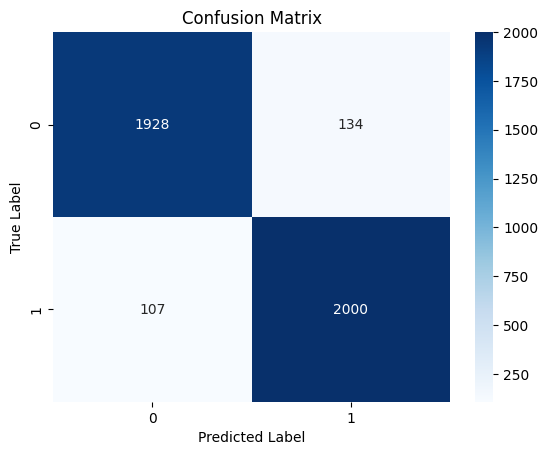


Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.94      0.94      2062
        True       0.94      0.95      0.94      2107

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169


Accuracy and F1 Score table:
      Model  Accuracy  F1 Score
0  CatBoost  0.942192  0.943174


In [9]:
# Predict the labels for test set
y_pred = catboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display accuracy and F1 score
results = pd.DataFrame({
    'Model': ['CatBoost'],
    'Accuracy': [accuracy],
    'F1 Score': [f1]
})
print("\nAccuracy and F1 Score table:")
print(results)